# Hong Kong Weather & Pollution: Exploratory Data Analysis
  
**The Data Science Method**  


1.   Problem Identification 

2.   Data Wrangling 
  * Data Collection 
   * Data Organization
  * Data Definition 
  * Data Cleaning
 
3.   **Exploratory Data Analysis** 
 * Build data profile tables and plots
        - Outliers & Anomalies
 * Explore data relationships
 * Identification and creation of features

4.   Pre-processing and Training Data Development
  * Create dummy or indicator features for categorical variables
  * Standardize the magnitude of numeric features
  * Split into testing and training datasets
  * Apply scaler to the testing set
5.   Modeling 
  * Fit Models with Training Data Set
  * Review Model Outcomes — Iterate over additional models as needed.
  * Identify the Final Model

6.   Documentation
  * Review the Results
  * Present and share your findings - storytelling
  * Finalize Code 
  * Finalize Documentation

## Load Required Python Packages

In [18]:
# load python packages from environment
import os
import urllib.request
import seaborn as sns
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

<b>Locate and print current working directory.</b>

In [19]:
path = os.getcwd()
parent = os.path.dirname(path)
print(path)
print(parent)

/Users/tiffanyflor/Dropbox/MyProjects/HongKongPollution/HongKongPollution/notebooks
/Users/tiffanyflor/Dropbox/MyProjects/HongKongPollution/HongKongPollution


<b>Get parent directory and append path to processed data.</b>

In [20]:
# Create raw data path by getting parent directory of current working directory and appending data/processed
parent_path = os.path.dirname(path)
data_path = os.path.join(parent_path, 'data', 'interim')
print(data_path)

/Users/tiffanyflor/Dropbox/MyProjects/HongKongPollution/HongKongPollution/data/interim


In [21]:
os.listdir(data_path)

['monthly_pollution_2014_2020.csv',
 'daily_max_pollution.csv',
 'hourly_pollution.csv',
 '.gitkeep',
 'pollution_monthly_min_2014_2020.csv',
 'pollution_monthly_max_2014_2020.csv',
 'joined_weather_pollution_all_districts.csv',
 'cleaned_weather_2014_2020.csv']

## Load Weather & Pollution Data into DataFrame

In [22]:
df = pd.read_csv(data_path+'/joined_weather_pollution_all_districts.csv',index_col=0)

In [23]:
df.head()

,Mean Pressure (hPa),Mean Daily Max Air Temp (C°),Mean Air Temp (C°),Mean Daily Min Air Temp (C°),Mean Dew Point (C°),Mean Relative Humidity (%),Mean Amount of Cloud Coverage (%),Total Rainfall (mm),Prevailing Wind Direction (degrees),Mean Wind Speed (km/h),...,Kwai Chung,Tsuen Wan,Yuen Long,Tuen Mun,Tung Chung,Tai Po,Sha Tin,Causeway Bay,Central,Mong Kok
2014-01,1021.3,19.2,16.3,14.1,9.9,67,32,1.0,40,22.9,...,5.181452,5.119624,5.233871,5.362903,5.282258,4.696237,4.931452,6.310484,6.110215,5.631720
2014-02,1017.7,17.9,15.5,13.5,12.3,82,73,39.5,50,26.6,...,3.511905,3.474702,3.403274,3.407738,3.558036,3.437500,3.312500,4.379464,4.346726,4.049107
2014-03,1017.1,20.9,18.7,17.0,15.7,83,77,207.6,60,24.1,...,3.897849,3.901882,3.767473,3.719086,3.744624,3.721774,3.716398,5.024194,4.790323,4.494624
2014-04,1013.4,24.9,22.6,21.0,20.0,86,72,132.4,80,20.6,...,4.166667,4.075000,3.943056,3.919444,3.751389,3.820833,3.912500,4.962500,4.919444,4.898611
2014-05,1009.5,28.6,26.4,24.6,23.7,86,82,687.3,240,23.7,...,3.068548,2.803763,2.782258,2.646505,2.631720,2.775538,2.837366,3.750000,3.473118,3.483871


## Column Names

In [24]:
df.columns

Index(['Mean Pressure (hPa)', 'Mean Daily Max Air Temp (C°)',
       'Mean Air Temp (C°)', 'Mean Daily Min Air Temp (C°)',
       'Mean Dew Point (C°)', 'Mean Relative Humidity (%)',
       'Mean Amount of Cloud Coverage (%)', 'Total Rainfall (mm)',
       'Prevailing Wind Direction (degrees)', 'Mean Wind Speed (km/h)',
       'Central/Western', 'Eastern', 'Kwun Tong', 'Sham Shui Po', 'Kwai Chung',
       'Tsuen Wan', 'Yuen Long', 'Tuen Mun', 'Tung Chung', 'Tai Po', 'Sha Tin',
       'Causeway Bay', 'Central', 'Mong Kok'],
      dtype='object')

In [25]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Mean Pressure (hPa),82.0,1012.897561,5.784227,1001.900000,1007.625000,1013.300000,1017.700000,1022.200000
Mean Daily Max Air Temp (C°),82.0,26.650000,4.916695,17.800000,21.825000,27.600000,31.375000,33.300000
Mean Air Temp (C°),82.0,24.056098,4.761707,15.500000,19.375000,25.300000,28.675000,30.200000
Mean Daily Min Air Temp (C°),82.0,22.178049,4.723830,13.400000,17.625000,23.550000,26.775000,28.300000
Mean Dew Point (C°),82.0,19.932927,5.097423,9.900000,15.700000,20.400000,25.000000,25.900000
Mean Relative Humidity (%),82.0,78.609756,5.032625,66.000000,76.000000,79.000000,82.750000,89.000000
Mean Amount of Cloud Coverage (%),82.0,69.597561,10.420611,32.000000,65.000000,71.500000,77.000000,84.000000
Total Rainfall (mm),82.0,208.075610,200.816147,1.000000,41.400000,141.500000,345.825000,708.800000
Prevailing Wind Direction (degrees),82.0,109.756098,77.443338,20.000000,60.000000,70.000000,210.000000,360.000000
Mean Wind Speed (km/h),82.0,22.864634,4.135047,12.800000,20.100000,22.800000,25.900000,37.100000


## Create DataFrame for AQHI in Causeway Bay
This will be used for prediction. I selected Causeway Bay AQHI as the dependent variable due to the fact that CWB has been rated by both [backpackers](link:https://www.thebrokebackpacker.com/where-to-stay-in-hong-kong/) and [others](link:https://misstourist.com/where-to-stay-in-hong-kong-best-hotels/) as the best location for families to stay. Since children and elderly are [most at risk for pollution related issues](link:https://www.health.nsw.gov.au/environment/air/Pages/who-is-affected.aspx), it is the most relevant AQHI to this study.

In [26]:
cwb_df = df[['Mean Pressure (hPa)', 'Mean Daily Max Air Temp (C°)',
       'Mean Air Temp (C°)', 'Mean Daily Min Air Temp (C°)',
       'Mean Dew Point (C°)', 'Mean Relative Humidity (%)',
       'Mean Amount of Cloud Coverage (%)', 'Total Rainfall (mm)',
       'Prevailing Wind Direction (degrees)', 'Mean Wind Speed (km/h)','Causeway Bay']]
cwb_df.columns = ['Mean Pressure (hPa)', 'Mean Daily Max Air Temp (C°)',
       'Mean Air Temp (C°)', 'Mean Daily Min Air Temp (C°)',
       'Mean Dew Point (C°)', 'Mean Relative Humidity (%)',
       'Mean Amount of Cloud Coverage (%)', 'Total Rainfall (mm)',
       'Prevailing Wind Direction (degrees)', 'Mean Wind Speed (km/h)','Causeway Bay Monthly Avg AQHI']
cwb_df.head()

,Mean Pressure (hPa),Mean Daily Max Air Temp (C°),Mean Air Temp (C°),Mean Daily Min Air Temp (C°),Mean Dew Point (C°),Mean Relative Humidity (%),Mean Amount of Cloud Coverage (%),Total Rainfall (mm),Prevailing Wind Direction (degrees),Mean Wind Speed (km/h),Causeway Bay Monthly Avg AQHI
2014-01,1021.3,19.2,16.3,14.1,9.9,67,32,1.0,40,22.9,6.310484
2014-02,1017.7,17.9,15.5,13.5,12.3,82,73,39.5,50,26.6,4.379464
2014-03,1017.1,20.9,18.7,17.0,15.7,83,77,207.6,60,24.1,5.024194
2014-04,1013.4,24.9,22.6,21.0,20.0,86,72,132.4,80,20.6,4.962500
2014-05,1009.5,28.6,26.4,24.6,23.7,86,82,687.3,240,23.7,3.750000


### Map Pollution Rating to Health Risk Categories

In [30]:
aqhi_mapper = {1.0:'Low',
               2.0:'Low',
               3.0:'Low',
               4.0:'Moderate',
               5.0:'Moderate',
               6.0:'Moderate',
               7.0:'High',
               8.0:'Very High',
               9.0:'Very High',
               10.0:'Very High',
               11.0:'Serious'}

cwb_df['Causeway Bay AQHI Rating']= round(cwb_df['Causeway Bay Monthly Avg AQHI']).map(aqhi_mapper)


<ipython-input-30-b87e50714e28>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cwb_df['Causeway Bay AQHI Rating']= round(cwb_df['Causeway Bay Monthly Avg AQHI']).map(aqhi_mapper)


In [31]:
cwb_df.head()

,Mean Pressure (hPa),Mean Daily Max Air Temp (C°),Mean Air Temp (C°),Mean Daily Min Air Temp (C°),Mean Dew Point (C°),Mean Relative Humidity (%),Mean Amount of Cloud Coverage (%),Total Rainfall (mm),Prevailing Wind Direction (degrees),Mean Wind Speed (km/h),Causeway Bay Monthly Avg AQHI,Causeway Bay AQHI Rating
2014-01,1021.3,19.2,16.3,14.1,9.9,67,32,1.0,40,22.9,6.310484,Moderate
2014-02,1017.7,17.9,15.5,13.5,12.3,82,73,39.5,50,26.6,4.379464,Moderate
2014-03,1017.1,20.9,18.7,17.0,15.7,83,77,207.6,60,24.1,5.024194,Moderate
2014-04,1013.4,24.9,22.6,21.0,20.0,86,72,132.4,80,20.6,4.962500,Moderate
2014-05,1009.5,28.6,26.4,24.6,23.7,86,82,687.3,240,23.7,3.750000,Moderate


<AxesSubplot:>

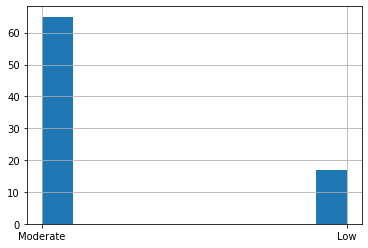

In [33]:
cwb_df['Causeway Bay AQHI Rating'].hist()

<AxesSubplot:>

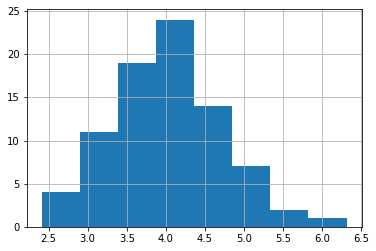

In [36]:
cwb_df['Causeway Bay Monthly Avg AQHI'].hist(bins=8)

### Examine Pollution Summary Statistics

In [37]:
cwb_df.shape

(82, 12)

In [38]:
cwb_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 82 entries, 2014-01 to 2020-10
Data columns (total 12 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Mean Pressure (hPa)                  82 non-null     float64
 1   Mean Daily Max Air Temp (C°)         82 non-null     float64
 2   Mean Air Temp (C°)                   82 non-null     float64
 3   Mean Daily Min Air Temp (C°)         82 non-null     float64
 4   Mean Dew Point (C°)                  82 non-null     float64
 5   Mean Relative Humidity (%)           82 non-null     int64  
 6   Mean Amount of Cloud Coverage (%)    82 non-null     int64  
 7   Total Rainfall (mm)                  82 non-null     float64
 8   Prevailing Wind Direction (degrees)  82 non-null     int64  
 9   Mean Wind Speed (km/h)               82 non-null     float64
 10  Causeway Bay Monthly Avg AQHI        82 non-null     float64
 11  Causeway Bay AQHI Rating    

## Build data profile tables and plots

In [39]:
cwb_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Mean Pressure (hPa),82.0,1012.897561,5.784227,1001.900000,1007.625000,1013.3000,1017.700000,1022.200000
Mean Daily Max Air Temp (C°),82.0,26.650000,4.916695,17.800000,21.825000,27.6000,31.375000,33.300000
Mean Air Temp (C°),82.0,24.056098,4.761707,15.500000,19.375000,25.3000,28.675000,30.200000
Mean Daily Min Air Temp (C°),82.0,22.178049,4.723830,13.400000,17.625000,23.5500,26.775000,28.300000
Mean Dew Point (C°),82.0,19.932927,5.097423,9.900000,15.700000,20.4000,25.000000,25.900000
Mean Relative Humidity (%),82.0,78.609756,5.032625,66.000000,76.000000,79.0000,82.750000,89.000000
Mean Amount of Cloud Coverage (%),82.0,69.597561,10.420611,32.000000,65.000000,71.5000,77.000000,84.000000
Total Rainfall (mm),82.0,208.075610,200.816147,1.000000,41.400000,141.5000,345.825000,708.800000
Prevailing Wind Direction (degrees),82.0,109.756098,77.443338,20.000000,60.000000,70.0000,210.000000,360.000000
Mean Wind Speed (km/h),82.0,22.864634,4.135047,12.800000,20.100000,22.8000,25.900000,37.100000


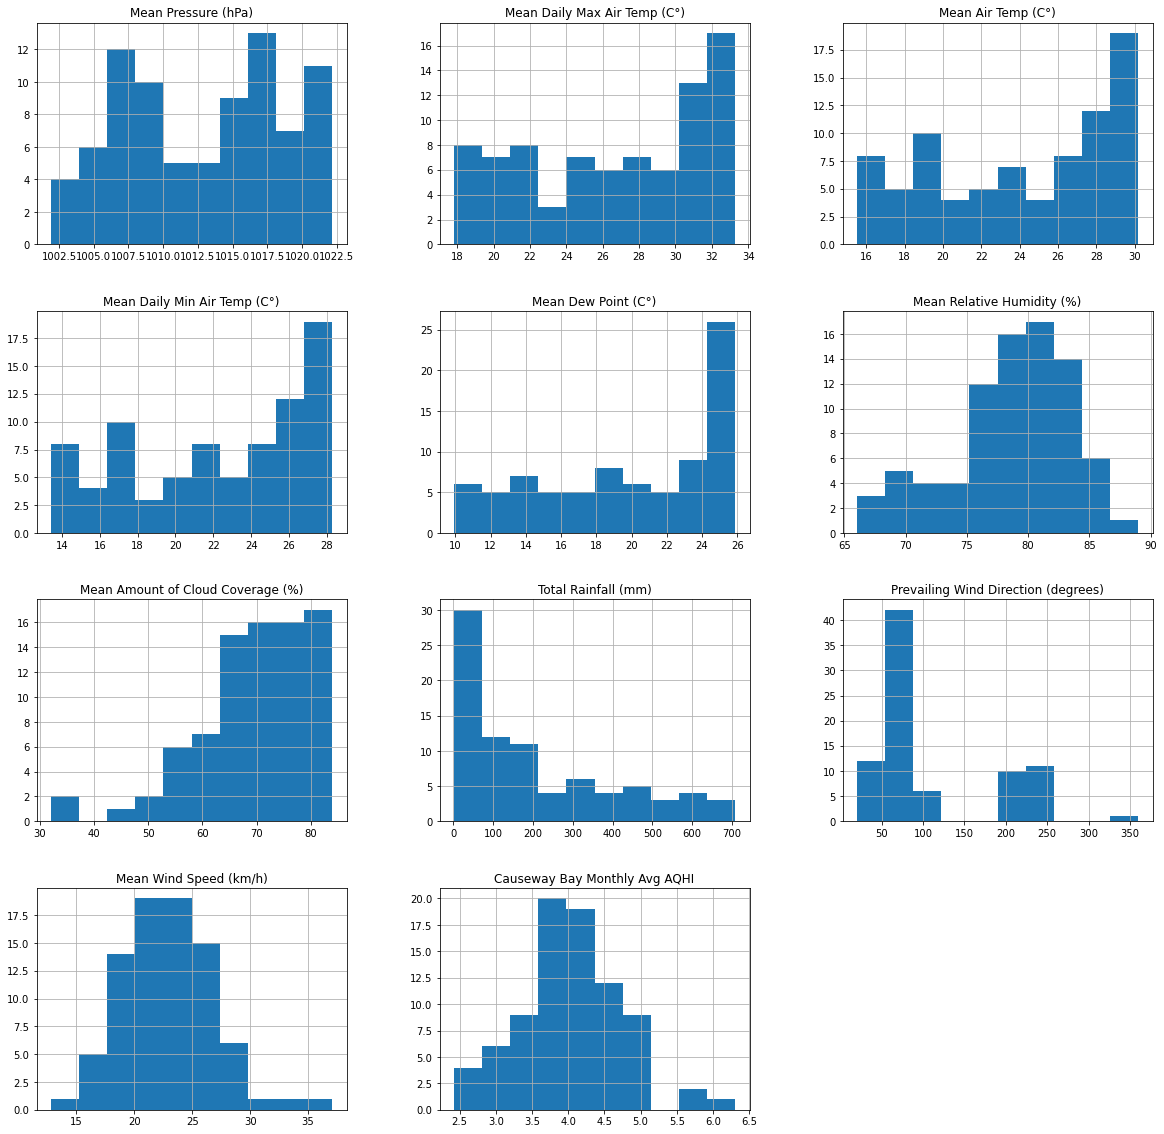

In [43]:
hist = cwb_df.hist(figsize=(20,20))

Look for similarities in the features that may indicate that they are duplicates or highly coorelated features. Make note of any interesting insights or findings.

- Look further into mean amount of cloud coverage and mean relative humidity (possible correlation)
- Mean wind speed and Monthly Avg AQHI have a similar distribution.

## Anamolies & Outliers

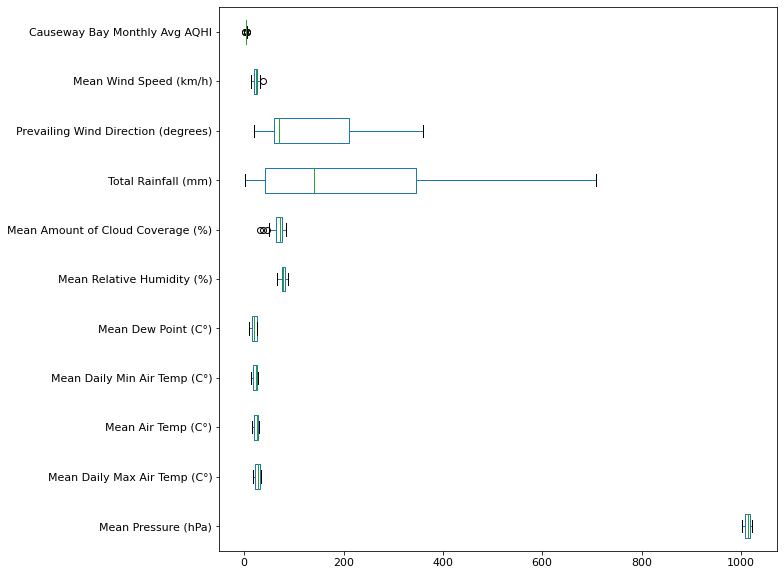

In [44]:
boxplot = cwb_df.boxplot(grid=False, vert=False, fontsize=11, figsize=(10,10))

Text(0.5, 0, 'Date')

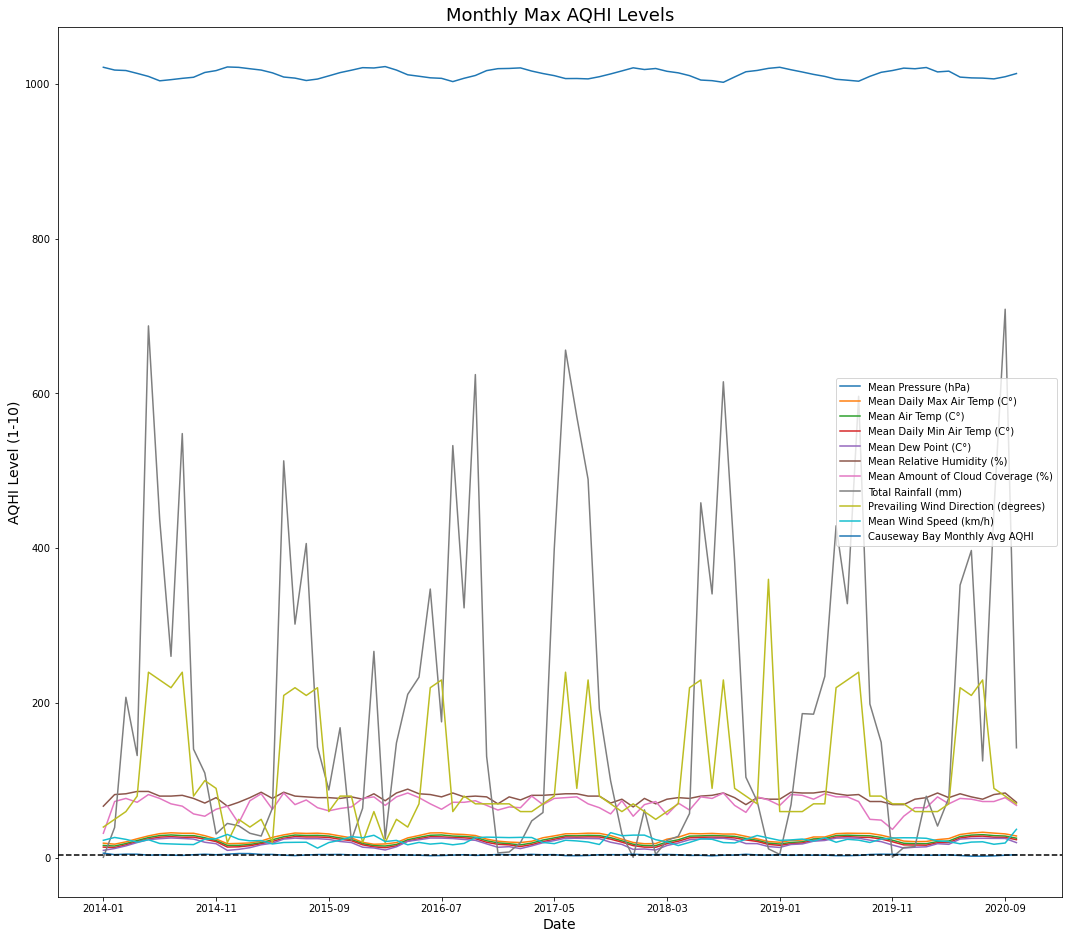

In [41]:
fig= cwb_df.plot(figsize=(18,16)).get_figure()
plt.title('Monthly Max AQHI Levels', size=18)
plt.axhline(y=3.5, color='black', linestyle='--')
plt.ylabel('AQHI Level (1-10)', size=14)
plt.xlabel('Date', size=14)

#fig.savefig(parent+'/visualizations/Average_monthly_aqhi_timeseries_all_districts.jpg')


The dashed line in the graph represents the boundary between 'low' and 'moderate' risk on the AQHI scale. As can be seen in the graph, the summer months have a seasonal drop in AQHI level. This suggests that summertime is a better time to visit for individuals who suffer from pollution irritated respiratory issues.

In [ ]:
monthly_max.hist()

In [ ]:
monthly_max.describe().T